In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row',500)
pd.options.display.max_columns = 150

In [98]:
df=pd.read_csv('C:/Users/hp/Desktop/DSP/New folder (2)/Python/Credit risk/Train_data.csv')

In [21]:
df.shape

(598978, 73)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,5.989780e+05,5.989780e+05,598978.000000,598978.000000,598978.000000,598978,598978.000000,598978.000000,598978,598978,564513,570873,598978,5.989780e+05,598978,598978,598978,121801,598978,598960,598978,598978,598978.000000,598978.000000,598978,598978.000000,284010.000000,85758.000000,598978.000000,598978.000000,5.989780e+05,598637.000000,598978.000000,598978,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598522,598978.000000,354291,598935,598922.000000,138227.000000,598978.0,598978,0.0,0.0,0.0,598978.000000,5.316650e+05,5.316650e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.316650e+05,0.0,0.0,0.0,598978.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,235311,11,6,NaN,3,96,2,120325,14,60953,901,50,NaN,NaN,677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,3,102,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-14,n,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-16,NaN,Feb-16,Jan-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,427239,NaN,NaN,173419,39269,7971,195407,301448,NaN,210453,37442,598973,230,356155,248846,6735,90043,NaN,NaN,4563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273965,NaN,311462,451313,NaN,NaN,NaN,598978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.044157e+07,2.231985e+07,14540.642519,14521.789031,14478.973948,NaN,13.520911,434.562058,NaN,NaN,NaN,NaN,NaN,7.397280e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.638408,0.297171,NaN,0.731226,34.131985,72.798934,11.357197,0.177768,1.650743e+04,55.838410,25.226733,NaN,5946.808215,5945.054198,10073.087967,10029.098206,7730.781476,2274.617695,0.439511,67.249287,7.075547,NaN,2815.793083,NaN,NaN,0.011255,43.363084,1.0,NaN,NaN,NaN,NaN,0.004625,2.089273e+02,1.389905e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.111062e+04,NaN,NaN,NaN,0.077058
std,1.619182e+07,1.711491e+07,8336.476483,8327.529212,8337.695086,NaN,4.370961,242.892709,NaN,NaN,NaN,NaN,NaN,5.676163e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.070746,0.828659,NaN,1.000495,21.796878,29.075841,5.138351,0.547331,2.093414e+04,23.711238,11.717682,NaN,7330.142896,7328.397671,8091.548244,8070.839362,6923.288534,2270.974523,4.245093,491.327816,74.587986,NaN,5398.379951,NaN,NaN,0.119935,21.860221,0.0,NaN,NaN,NaN,NaN,0.075951,1.268440e+04,1.525544e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.638326e+04,NaN,NaN,NaN,0.266684
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,5.320000,15.690000,NaN,NaN,NaN,NaN,NaN,3.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,0.000000,0

In [4]:
#unique values
for feature in df.columns:
    print(feature,df[feature].unique().shape)

id (598978,)
member_id (598978,)
loan_amnt (1358,)
funded_amnt (1360,)
funded_amnt_inv (8817,)
term (2,)
int_rate (502,)
installment (60966,)
grade (7,)
sub_grade (35,)
emp_title (235312,)
emp_length (12,)
home_ownership (6,)
annual_inc (38466,)
verification_status (3,)
issue_d (96,)
pymnt_plan (2,)
desc (120326,)
purpose (14,)
title (60954,)
zip_code (901,)
addr_state (50,)
dti (4000,)
delinq_2yrs (26,)
earliest_cr_line (677,)
inq_last_6mths (9,)
mths_since_last_delinq (151,)
mths_since_last_record (124,)
open_acc (68,)
pub_rec (27,)
revol_bal (63435,)
revol_util (1292,)
total_acc (118,)
initial_list_status (2,)
out_prncp (171880,)
out_prncp_inv (179987,)
total_pymnt (409980,)
total_pymnt_inv (406503,)
total_rec_prncp (203394,)
total_rec_int (294790,)
total_rec_late_fee (5243,)
recoveries (22626,)
collection_recovery_fee (20388,)
last_pymnt_d (98,)
last_pymnt_amnt (215439,)
next_pymnt_d (4,)
last_credit_pull_d (103,)
collections_12_mths_ex_med (11,)
mths_since_last_major_derog (165,)


In [99]:
#dropping unique columns
df.drop(['id','member_id'],axis=1,inplace=True)

In [6]:
print(df['default_ind'].value_counts(),df['default_ind'].value_counts()/len(df['default_ind'])*100)
#This is an imbalanced dataset

0    552822
1     46156
Name: default_ind, dtype: int64 0    92.294208
1     7.705792
Name: default_ind, dtype: float64


In [ ]:
## Missing Values

In [100]:
## Here we will check the percentage of nan values present in each feature
## make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4)*100, '%missing values')
    

emp_title 5.75 %missing values
emp_length 4.6899999999999995 %missing values
desc 79.67 %missing values
title 0.0 %missing values
mths_since_last_delinq 52.580000000000005 %missing values
mths_since_last_record 85.68 %missing values
revol_util 0.06 %missing values
last_pymnt_d 0.08 %missing values
next_pymnt_d 40.849999999999994 %missing values
last_credit_pull_d 0.01 %missing values
collections_12_mths_ex_med 0.01 %missing values
mths_since_last_major_derog 76.92 %missing values
annual_inc_joint 100.0 %missing values
dti_joint 100.0 %missing values
verification_status_joint 100.0 %missing values
tot_coll_amt 11.24 %missing values
tot_cur_bal 11.24 %missing values
open_acc_6m 100.0 %missing values
open_il_6m 100.0 %missing values
open_il_12m 100.0 %missing values
open_il_24m 100.0 %missing values
mths_since_rcnt_il 100.0 %missing values
total_bal_il 100.0 %missing values
il_util 100.0 %missing values
open_rv_12m 100.0 %missing values
open_rv_24m 100.0 %missing values
max_bal_bc 100.0 %

In [11]:
#next_pymnt_d should be null for fully paid off loans and non null for defaulters.
#But there are some null values in next_pymnt_d which means these are charged off loans 
#for default_ind=1 we have 2 subcategoreies- default and charged off loans
#Lets find the count for each of them
df.loc[(df['next_pymnt_d'].isnull()) & (df['default_ind']==1) , ['recoveries','next_pymnt_d','out_prncp','default_ind']]

,recoveries,next_pymnt_d,out_prncp,default_ind
1,117.08,NaN,0.0,1
8,189.06,NaN,0.0,1
9,269.29,NaN,0.0,1
12,444.30,NaN,0.0,1
14,645.10,NaN,0.0,1
...,...,...,...,...
598905,0.00,NaN,0.0,1
598910,0.00,NaN,0.0,1
598931,0.00,NaN,0.0,1
598950,0.00,NaN,0.0,1


In [ ]:
#out of 46156 ,44999 are charged off loans

In [14]:
#lets find out the recoveries made for these charged off loans
df.loc[(df['next_pymnt_d'].isnull()) & (df['default_ind']==1) & (df['recoveries']>0) , ['recoveries','next_pymnt_d','out_prncp','default_ind']]

,recoveries,next_pymnt_d,out_prncp,default_ind
1,117.08,NaN,0.0,1
8,189.06,NaN,0.0,1
9,269.29,NaN,0.0,1
12,444.30,NaN,0.0,1
14,645.10,NaN,0.0,1
...,...,...,...,...
598064,3472.03,NaN,0.0,1
598266,21941.26,NaN,0.0,1
598557,1413.48,NaN,0.0,1
598719,5834.18,NaN,0.0,1


In [ ]:
#out of 44999 charged off loans 24186 recoveries are made

In [15]:
#number of charged off loans which have not been recovered
df.loc[(df['next_pymnt_d'].isnull()) & (df['default_ind']==1) & (df['recoveries']==0) , ['recoveries','next_pymnt_d','out_prncp','default_ind']]

,recoveries,next_pymnt_d,out_prncp,default_ind
21,0.0,NaN,0.0,1
26,0.0,NaN,0.0,1
55,0.0,NaN,0.0,1
131,0.0,NaN,0.0,1
153,0.0,NaN,0.0,1
...,...,...,...,...
598905,0.0,NaN,0.0,1
598910,0.0,NaN,0.0,1
598931,0.0,NaN,0.0,1
598950,0.0,NaN,0.0,1


In [ ]:
#20813 charged off loans no recoveries made

In [16]:
#for default_ind=0 we have two subcategories- non default and current loans
#Lets find the count for each of them
df.loc[(df['default_ind']==0) & (df['out_prncp']>0), ['recoveries','next_pymnt_d','out_prncp','default_ind']]

,recoveries,next_pymnt_d,out_prncp,default_ind
4,0.0,Feb-16,766.90,0
6,0.0,Feb-16,1889.15,0
32,0.0,Jan-16,2695.31,0
39,0.0,Jan-16,3193.13,0
61,0.0,Jan-16,2462.25,0
...,...,...,...,...
598973,0.0,Feb-16,7055.47,0
598974,0.0,Feb-16,16933.26,0
598975,0.0,Feb-16,11155.50,0
598976,0.0,Feb-16,10447.31,0


In [ ]:
#out of 552822, 353089 are current and 199733 are non default loans

In [101]:
#getting features with more than 75% NA's
feature_drop_na=[feature for feature in df.columns if df[feature].isnull().mean()*100>75]
feature_drop_na

['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [102]:
#dropping features with more than 75% NA's
for feature in feature_drop_na:
    df.drop([feature],axis=1,inplace=True)

In [84]:
df.shape

(598978, 51)

In [13]:
#check if data has duplicates
df.duplicated().any()

False

In [103]:
#Dealing with date variables
year_feature=[feature for feature in ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']]
for feature in year_feature:
    df[feature]=pd.to_datetime(df[feature].str.upper(), format='%b-%y', yearfirst=False)
    


In [104]:
#Length of credit history in years
 
df['cred_hist_len_years']=df['issue_d'].dt.year-df['earliest_cr_line'].dt.year

df['cred_hist_len_years'].head()

0    26
1    12
2    10
3    15
4    15
Name: cred_hist_len_years, dtype: int64

In [105]:
df['term']=df['term'].apply(lambda x: x.rstrip('months'))
df['term']=df['term'].astype('int64')

In [106]:
df['emp_length']=df['emp_length'].map({'10+ years':'10','< 1 year':'0.5','1 year':'1','3 years':'3','8 years':'8','9 years':'9',
                      '4 years':'4','5 years':'5','6 years':'6','2 years':'2','7 years':'7'})
df['emp_length']=df['emp_length'].astype('float64')
df['emp_length'].head()

0    10.0
1     0.5
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

In [66]:
### Numerical Variables
# list of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Numerical features are:', len(numerical_features))


Numerical features are: 40


In [16]:
# visualise the numerical variables
df[numerical_features].describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,cred_hist_len_years
count,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,570873.000000,5.989780e+05,598978,598978.000000,598978.000000,598978,598978.000000,284010.000000,598978.000000,598978.000000,5.989780e+05,598637.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598522,598978.000000,354291,598935,598922.000000,598978.0,598978.000000,5.316650e+05,5.316650e+05,5.316650e+05,598978.000000,598978.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,NaN,677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,3,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-01 00:00:00,NaN,NaN,2001-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,2016-02-01 00:00:00,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37442,NaN,NaN,4563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273965,NaN,311462,451313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,1969-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,2016-01-01 00:00:00,2007-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01 00:00:00,NaN,NaN,2068-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,2016-03-01 00:00:00,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14540.642519,14521.789031,14478.973948,42.881281,13.520911,434.562058,6.056012,7.397280e+04,NaN,17.638408,0.297171,NaN,0.731226,34.131985,11.357197,0.177768,1.650743e+04,55.838410,25.226733,5946.808215,5945.054198,10073.087967,10029.098206,7730.781476,2274.617695,0.439511,67.249287,7.075547,NaN,2815.793083,NaN,NaN,0.011255,1.0,0.004625,2.089273e+02,1.389905e+05,3.111062e+04,0.077058,15.953688
std,8336.476483,8327.529212,8337.695086,10.853521,4.370961,242.892709,3.575170,5.676163e+04,NaN,8.070746,0.828659,NaN,1.000495,21.796878,5.138351,0.547331,2.093414e+04,23.711238,11.717682,7330.142896,7328.397671,8091.548244,8070.839362,6923.288534,2270.974523,4.245093,491.327816,74.587986,NaN,5398.379951,NaN,NaN,0.119935,0.0,0.075951,1.268440e+04,1.525544e+05,3.638326e+04,0.266684,7.965784
min,500.000000,500.000000,0.000000,36.000000,5.320000,15.690000,0.500000,3.000000e+03,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-60.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,10.160000,259.642500,3.000000,4.500000e+04,NaN,11.610000,0.000000,NaN,0.000000,16.000000,8.000000,0.000000,6.462000e+03,38.800000,17.000000,0.000000,0.000000,4242.350000,4219.600000,2764.050000,821.000000,0.000000,0.000000,0.000000,NaN,305.080000,NaN,NaN,0.000000,1.0,0.000000,0.000000e+00,2.919700e+04,1.370000e+04,0.000000,11.000000


In [107]:
df.drop(['total_rec_late_fee','collection_recovery_fee','funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','collections_12_mths_ex_med','acc_now_delinq'],axis=1,inplace=True)

In [108]:
df['pub_rec']=np.where(df['pub_rec']>0.0,1,0)
df['recoveries']=np.where(df['recoveries']>0.0,1,0)
df['delinq_2yrs']=np.where(df['delinq_2yrs']>0.0,1,0)


In [43]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print('discrete feature are:{}'.format(len(discrete_feature)))

discrete feature are:7


In [38]:
for feature in discrete_feature:
    print(feature,df[feature].unique().shape)
    print(feature,df[feature].value_counts())

term (2,)
term 36    427239
60    171739
Name: term, dtype: int64
emp_length (12,)
emp_length 10.0    195407
2.0      53373
3.0      47128
0.5      46526
5.0      38429
1.0      37879
4.0      35792
7.0      32676
6.0      31338
8.0      29126
9.0      23199
Name: emp_length, dtype: int64
delinq_2yrs (2,)
delinq_2yrs 0    488733
1    110245
Name: delinq_2yrs, dtype: int64
inq_last_6mths (9,)
inq_last_6mths 0    324734
1    165959
2     68634
3     28559
4      7460
5      2640
6       922
7        48
8        22
Name: inq_last_6mths, dtype: int64
pub_rec (2,)
pub_rec 0    513890
1     85088
Name: pub_rec, dtype: int64
recoveries (2,)
recoveries 0    574792
1     24186
Name: recoveries, dtype: int64
policy_code (1,)
policy_code 1    598978
Name: policy_code, dtype: int64
acc_now_delinq (2,)
acc_now_delinq 0    596424
1      2554
Name: acc_now_delinq, dtype: int64
default_ind (2,)
default_ind 0    552822
1     46156
Name: default_ind, dtype: int64


In [109]:
#Dropping single value variable
df.drop(['policy_code'],axis=1,inplace=True)

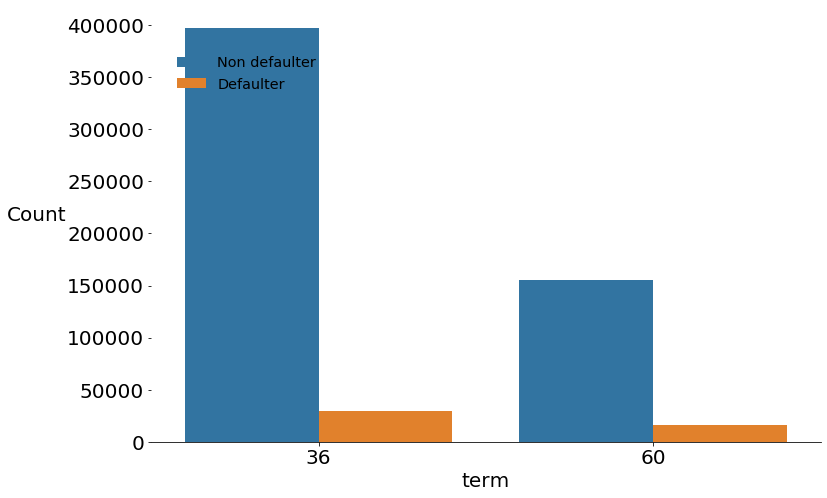

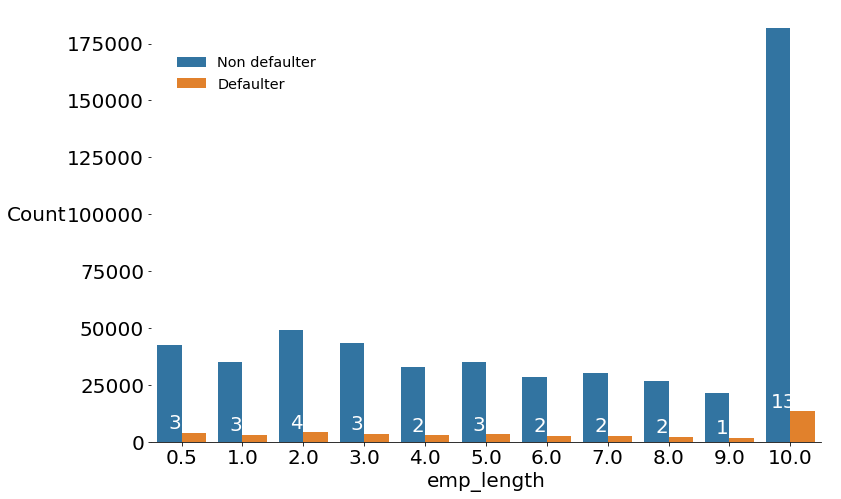

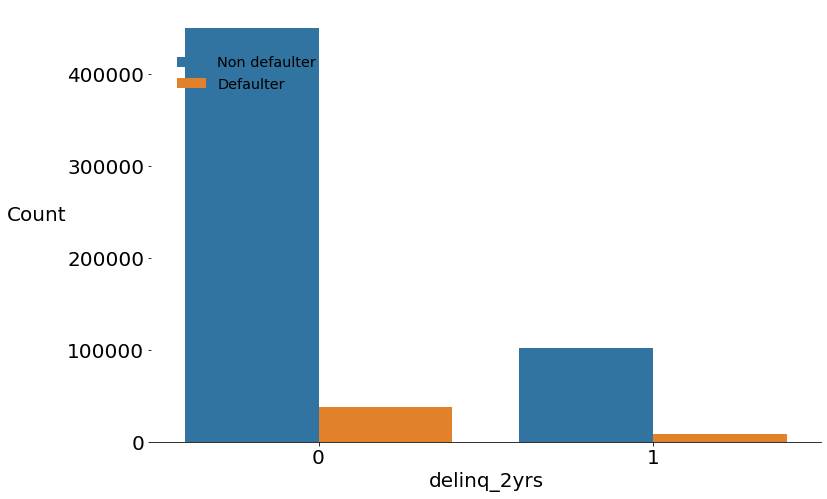

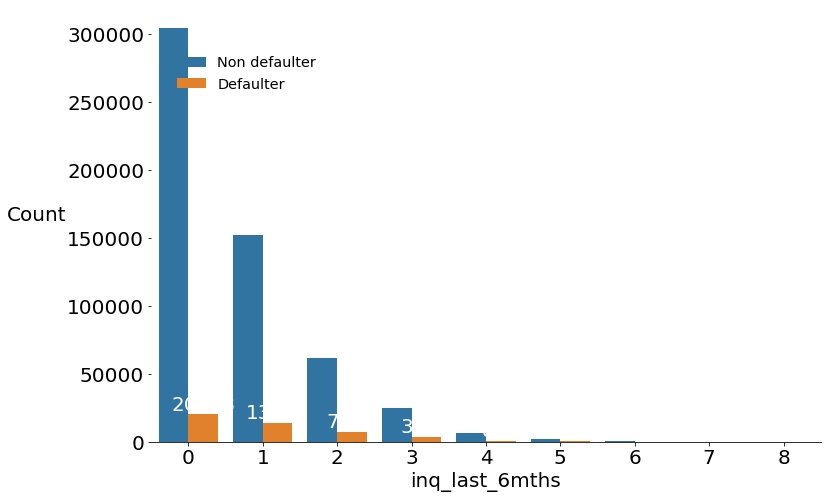

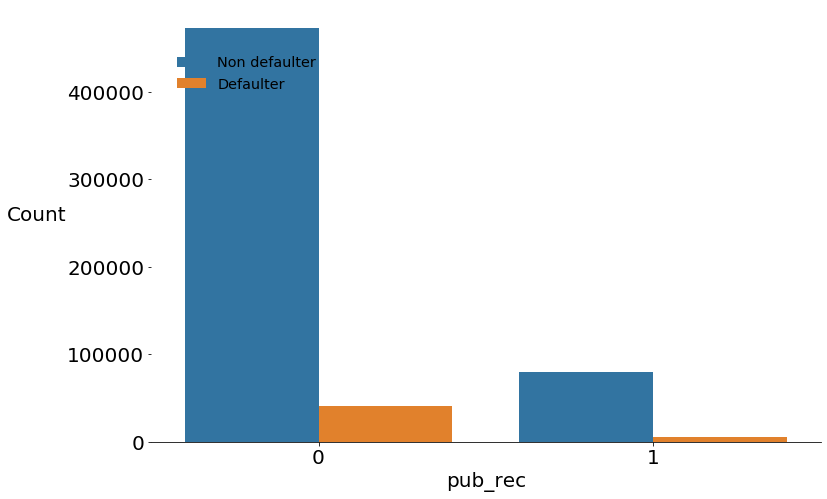

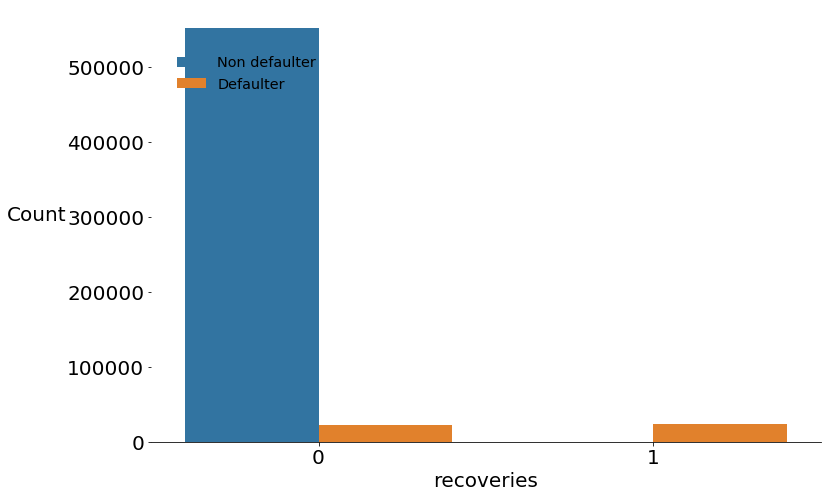

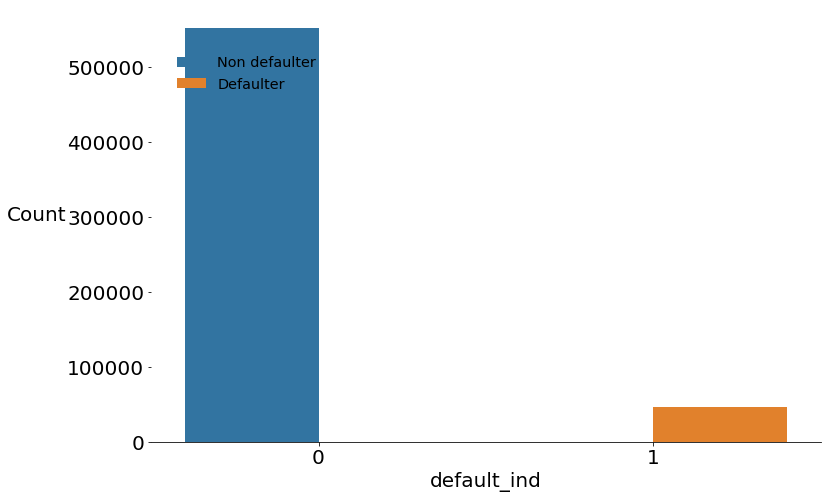

In [44]:
for feature in discrete_feature:
    data=df.copy()
    plt.figure(figsize=(12,8))
    fig = sns.countplot(x=feature, hue='default_ind', data=data)
    sns.despine(left=True)
    fig.set_xlabel(feature, fontsize=20)
    plt.xticks(fontsize=20)
    fig.set_ylabel('Count', fontsize=20, rotation=0)
    fig.yaxis.labelpad = 30
    plt.yticks(fontsize=20)
    for p in fig.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
    plt.legend(labels =['Non defaulter','Defaulter'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
    plt.show()
  

In [45]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print('Continuous feature are: {}'.format(len(continuous_feature)))

Continuous feature are: 19


In [26]:
# visualise the numerical variables
df[continuous_feature].head()

,loan_amnt,int_rate,installment,annual_inc,dti,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cred_hist_len_years
0,5000,10.65,162.87,24000.0,27.65,NaN,3,13648,83.7,9,0.0,5861.071414,5000.00,861.07,171.62,NaN,NaN,NaN,26
1,2500,15.27,59.83,30000.0,1.00,NaN,3,1687,9.4,4,0.0,1008.710000,456.46,435.17,119.66,NaN,NaN,NaN,12
2,2400,15.96,84.33,12252.0,8.72,NaN,2,2956,98.5,10,0.0,3003.653644,2400.00,603.65,649.91,NaN,NaN,NaN,10
3,10000,13.49,339.31,49200.0,20.00,35.0,10,5598,21.0,37,0.0,12226.302210,10000.00,2209.33,357.48,NaN,NaN,NaN,15
4,3000,12.69,67.79,80000.0,17.94,38.0,15,27783,53.9,38,766.9,3242.170000,2233.10,1009.07,67.79,NaN,NaN,NaN,15


In [27]:
df[continuous_feature].describe(include='all')

,loan_amnt,int_rate,installment,annual_inc,dti,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cred_hist_len_years
count,598978.000000,598978.000000,598978.000000,5.989780e+05,598978.000000,284010.000000,598978.000000,5.989780e+05,598637.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,5.316650e+05,5.316650e+05,5.316650e+05,598978.000000
mean,14540.642519,13.520911,434.562058,7.397280e+04,17.638408,34.131985,11.357197,1.650743e+04,55.838410,25.226733,5946.808215,10073.087967,7730.781476,2274.617695,2815.793083,2.089273e+02,1.389905e+05,3.111062e+04,15.953688
std,8336.476483,4.370961,242.892709,5.676163e+04,8.070746,21.796878,5.138351,2.093414e+04,23.711238,11.717682,7330.142896,8091.548244,6923.288534,2270.974523,5398.379951,1.268440e+04,1.525544e+05,3.638326e+04,7.965784
min,500.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-60.000000
25%,8000.000000,10.160000,259.642500,4.500000e+04,11.610000,16.000000,8.000000,6.462000e+03,38.800000,17.000000,0.000000,4242.350000,2764.050000,821.000000,305.080000,0.000000e+00,2.919700e+04,1.370000e+04,11.000000
50%,12600.000000,13.330000,381.840000,6.300000e+04,17.210000,31.000000,10.000000,1.187000e+04,57.000000,24.000000,3032.270000,7631.015000,5393.340000,1573.125000,507.380000,0.000000e+00,8.098600e+04,2.320000e+04,15.000000
75%,20000.000000,16.290000,568.900000,9.000000e+04,23.290000,50.000000,14.000000,2.061800e+04,74.300000,32.000000,10070.040000,13403.250000,10150.382500,2871.087500,1506.602500,0.000000e+00,2.084020e+05,3.870000e+04,20.000000
max,35000.000000,28.990000,1409.990000,8.706582e+06,39.990000,188.000000,90.000000,2.568995e+06,892.300000,162.000000,34073.890000,57777.579870,35000.030000,24205.620000,36475.590000,9.152545e+06,8.000078e+06,9.999999e+06,46.000000


In [28]:
df.loc[(df['dti']>100.0), ['installment','annual_inc','total_rev_hi_lim','tot_cur_bal','revol_util','dti','purpose']]

,installment,annual_inc,total_rev_hi_lim,tot_cur_bal,revol_util,dti,purpose


In [28]:
#dti is debt to income ratio
#dti=9999.0 for missing values in annual income hence changing it to zero
df['dti']=np.where(df['dti']==9999.0,0.0,df['dti'])

In [110]:
#checking skewness
for feature in continuous_feature:
    print(feature,df[feature].skew())

loan_amnt 0.7082189624568909
int_rate 0.3851112397436118
installment 0.9453419784970021
annual_inc 32.59676251037039
dti 0.2224647706516648
mths_since_last_delinq 0.45810730788830184
open_acc 1.2143597939222703
revol_bal 16.78810021749186
revol_util -0.15337926277686006
total_acc 0.8497449996186429
out_prncp 1.2520887411475408
total_pymnt 1.574637780209851
total_rec_prncp 1.6345540276341541
total_rec_int 2.5123775097470555
last_pymnt_amnt 2.8176880310138905
tot_coll_amt 706.7567800367611
tot_cur_bal 2.908249519862615
total_rev_hi_lim 81.51533219564323
cred_hist_len_years -0.8147601853262809


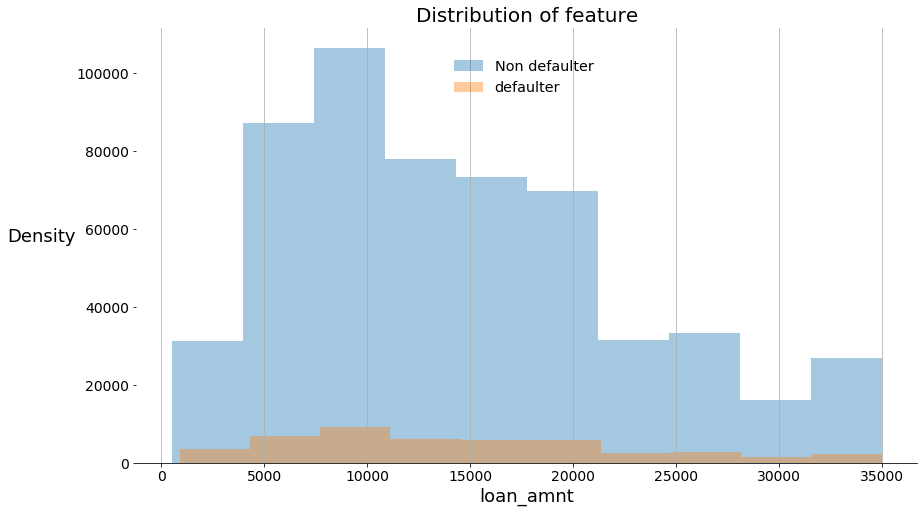

Average : 14540.642519424753
Average for non-defaulters: 14538.024535926574
Average for defaulters: 14571.998765057631


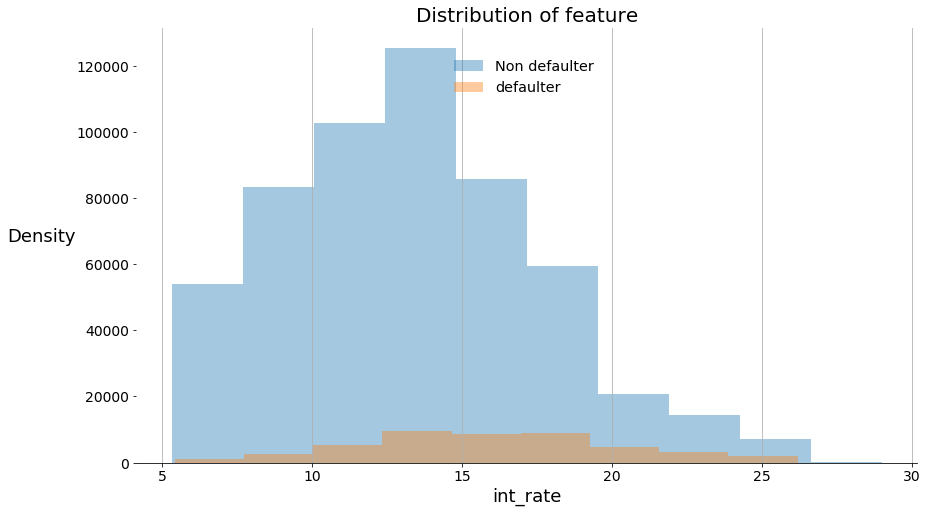

Average : 13.520910684598922
Average for non-defaulters: 13.312313167774333
Average for defaulters: 16.019335514341023


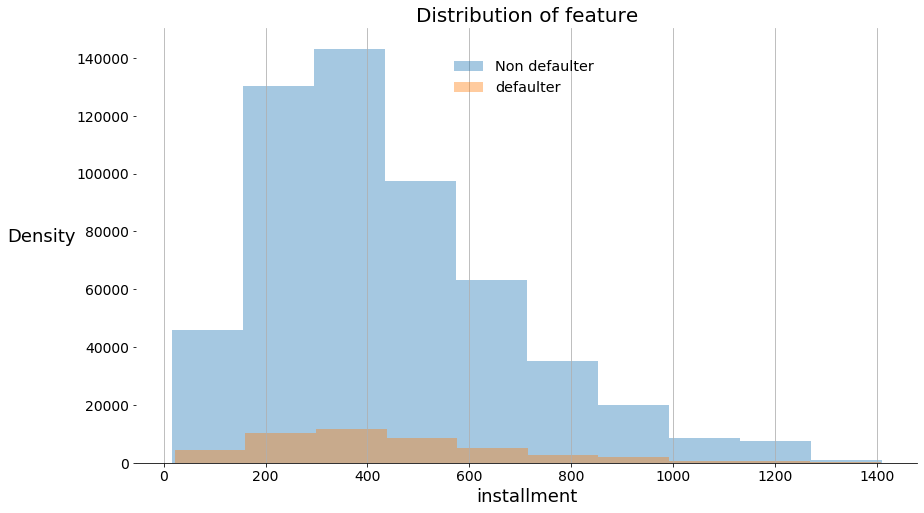

Average : 434.56205778841564
Average for non-defaulters: 434.0176246061146
Average for defaulters: 441.08287069936665


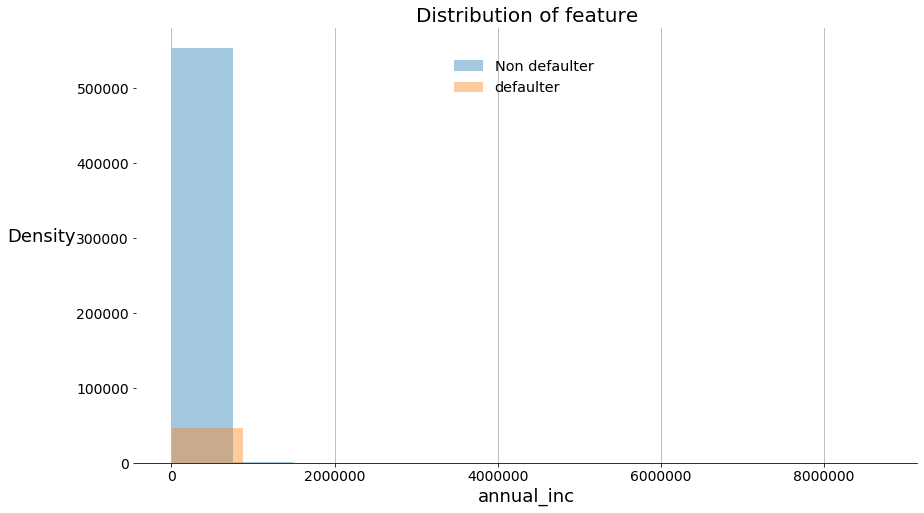

Average : 73972.8004821713
Average for non-defaulters: 74715.18500513711
Average for defaulters: 65081.07466634895


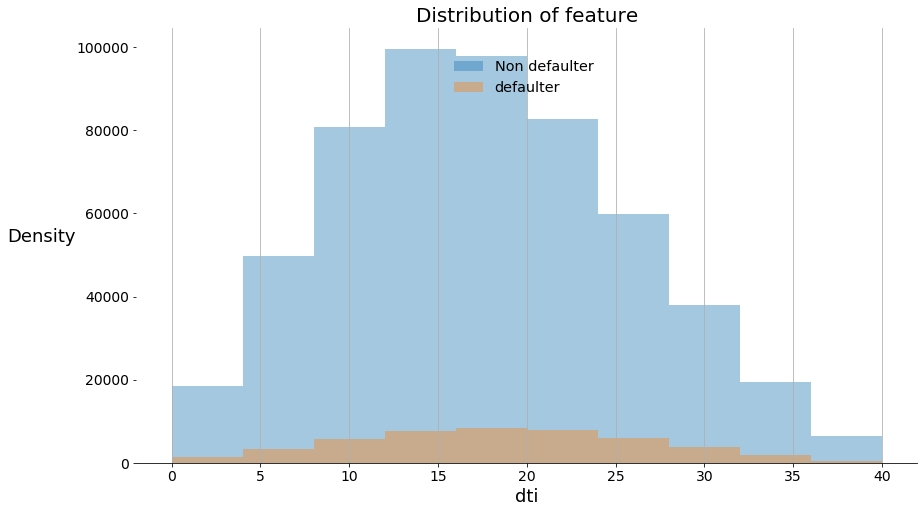

Average : 17.6384076376756
Average for non-defaulters: 17.57225779726531
Average for defaulters: 18.430700883958757


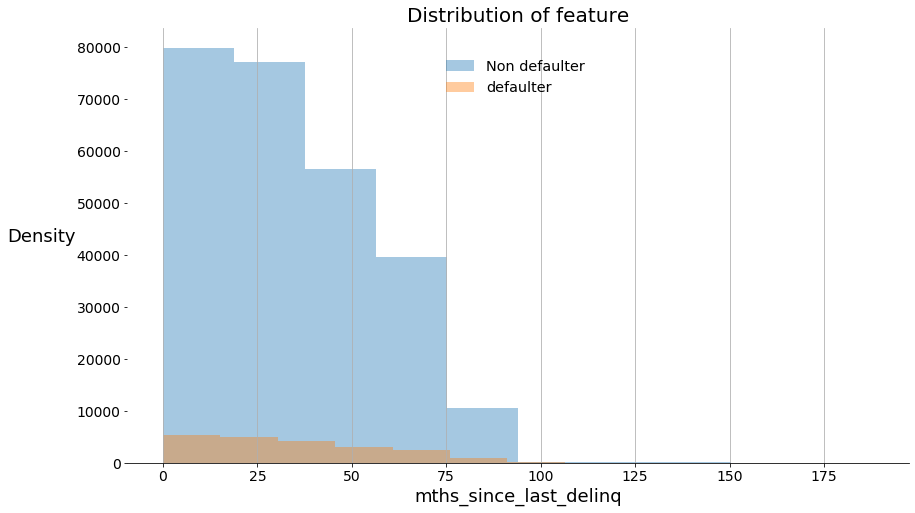

Average : 34.13198478926798
Average for non-defaulters: 34.11850667841115
Average for defaulters: 34.30411171450737


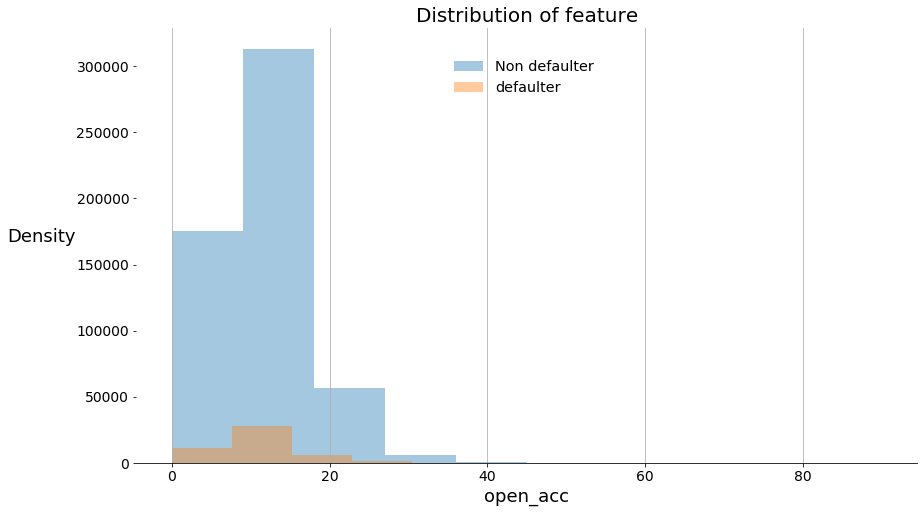

Average : 11.357196758478608
Average for non-defaulters: 11.382171838313237
Average for defaulters: 11.058063957015339


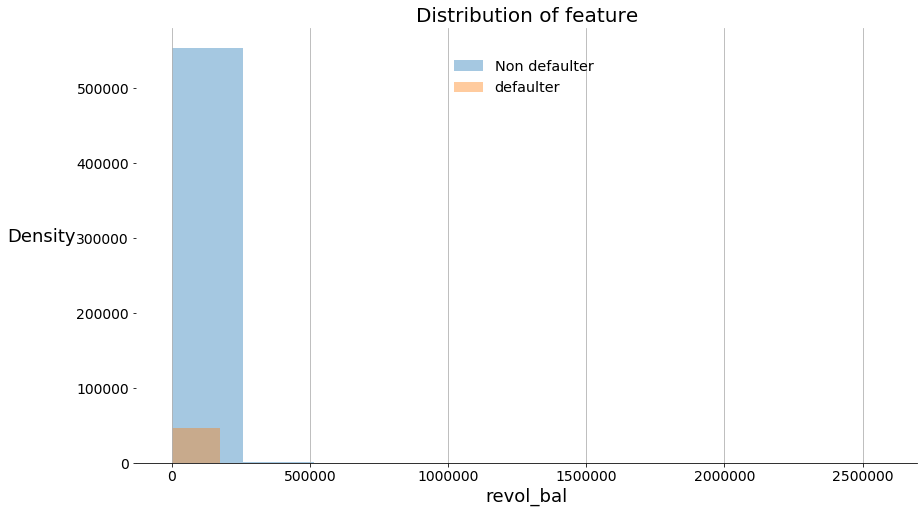

Average : 16507.430211126284
Average for non-defaulters: 16633.8873905163
Average for defaulters: 14992.820825028166


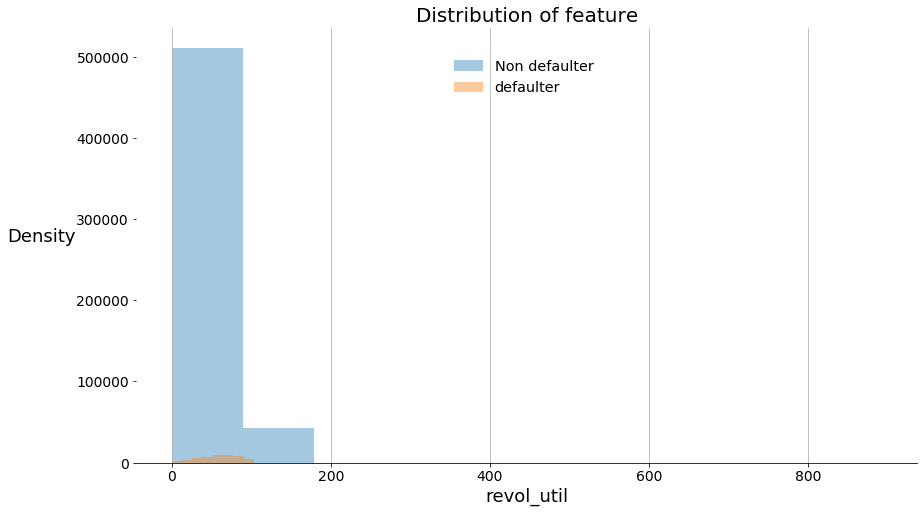

Average : 55.83840975415875
Average for non-defaulters: 55.53351295588103
Average for defaulters: 59.49209941875624


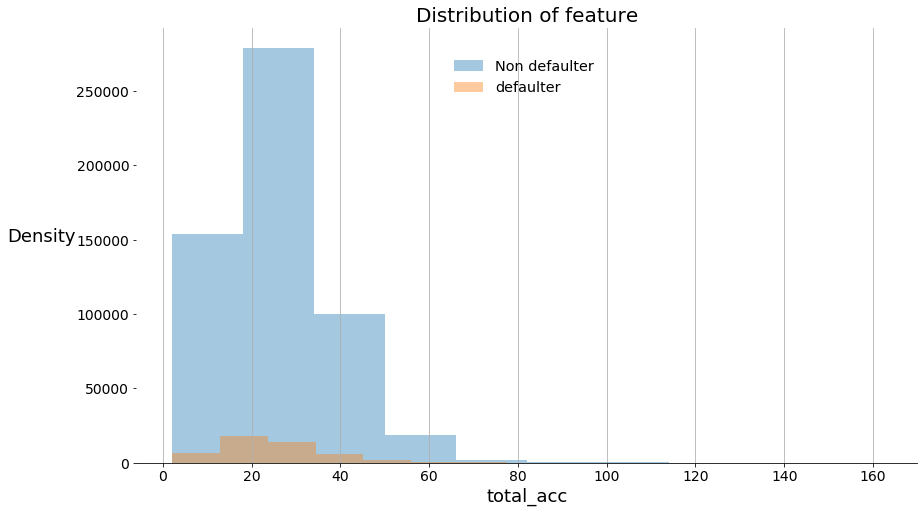

Average : 25.226732868319036
Average for non-defaulters: 25.31064972088665
Average for defaulters: 24.221639656816016


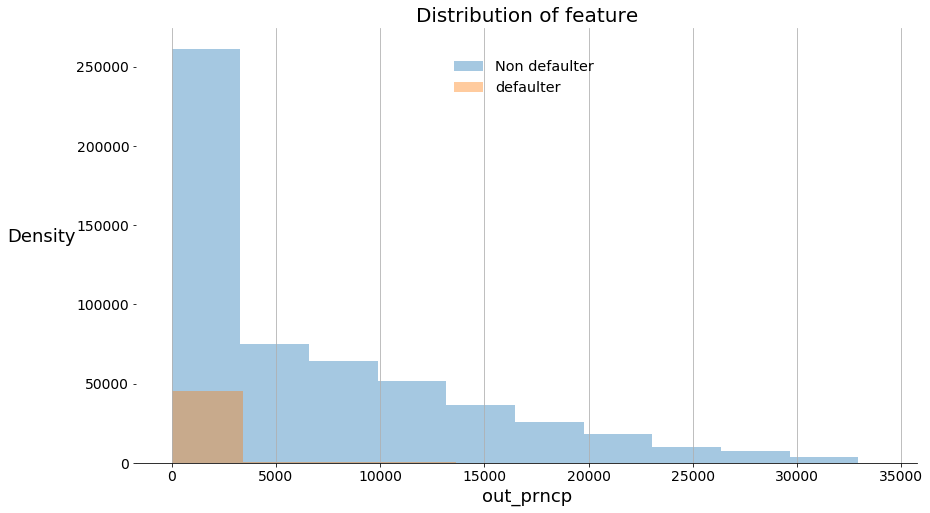

Average : 5946.808215326509
Average for non-defaulters: 6419.428335756957
Average for defaulters: 286.1183761591126


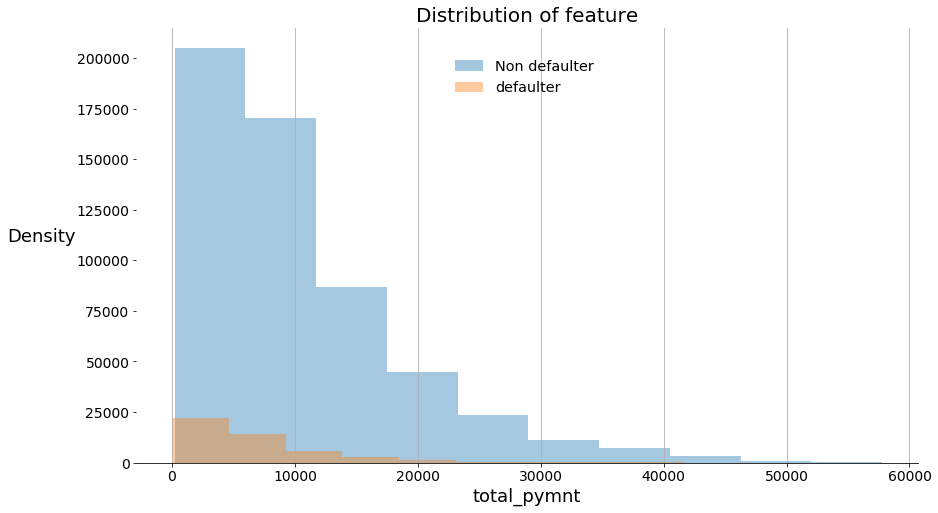

Average : 10073.08796691669
Average for non-defaulters: 10380.021085327613
Average for defaulters: 6396.872948582727


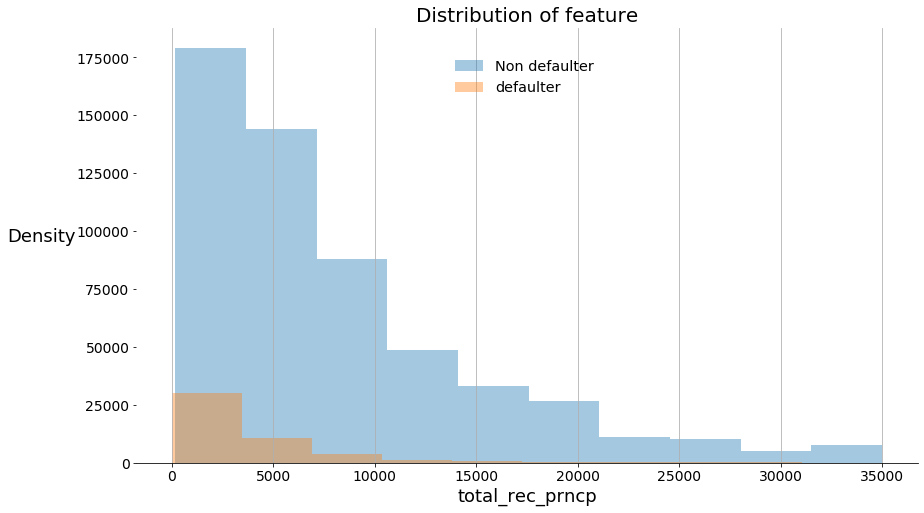

Average : 7730.781476148389
Average for non-defaulters: 8096.2356182283165
Average for defaulters: 3353.6454649449483


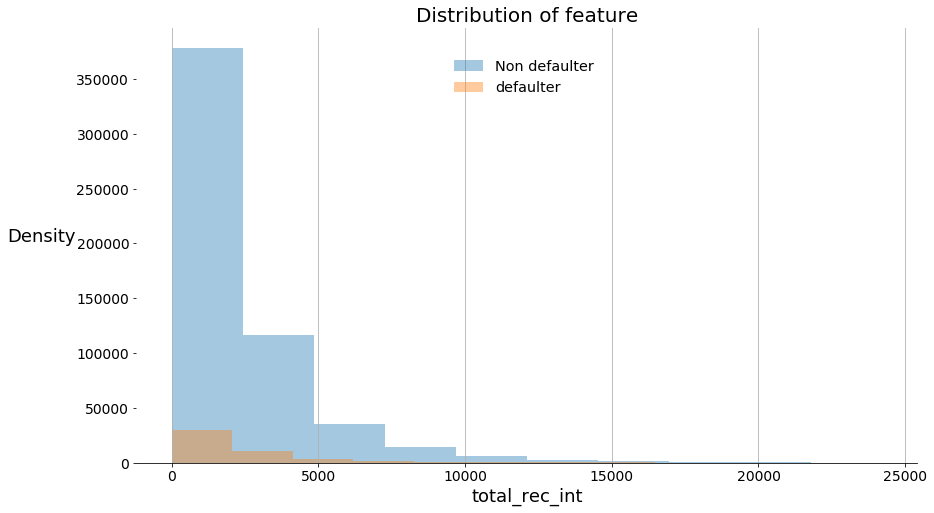

Average : 2274.6176951910384
Average for non-defaulters: 2283.514099077292
Average for defaulters: 2168.063232299146


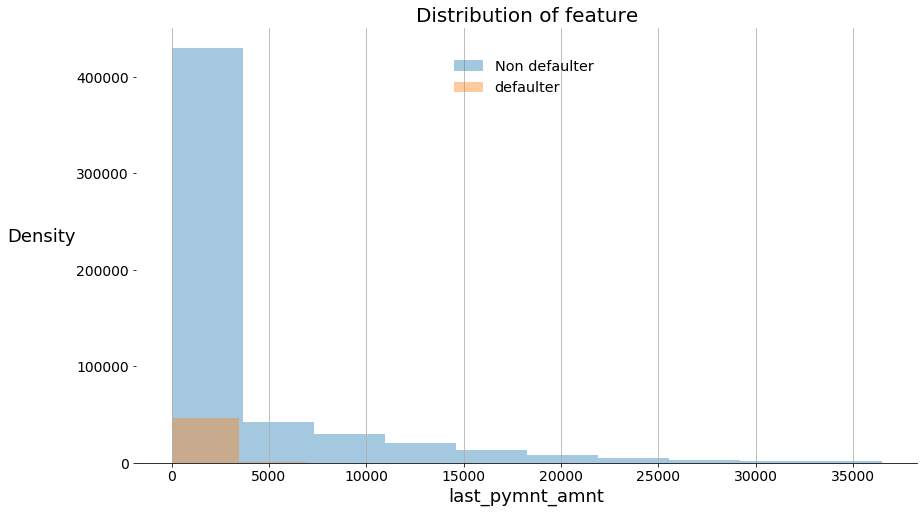

Average : 2815.7930834493122
Average for non-defaulters: 3012.8438117332544
Average for defaulters: 455.6670389183391


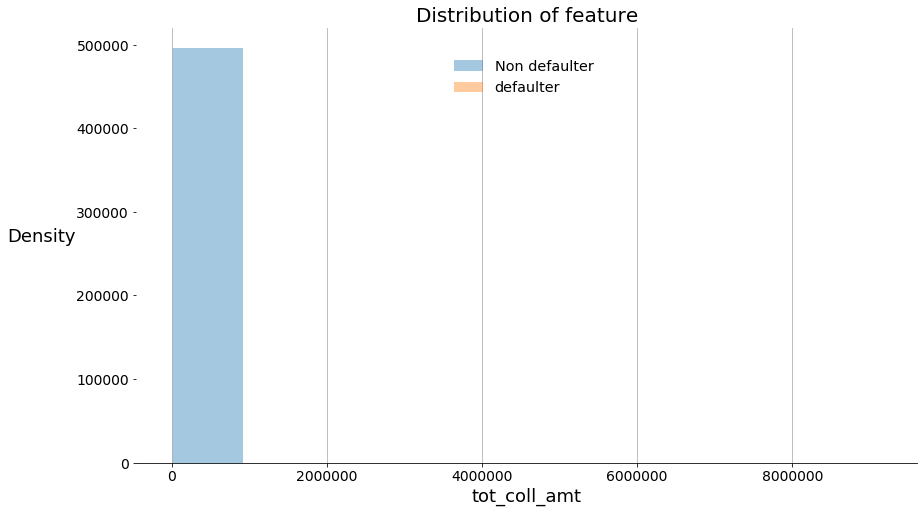

Average : 208.92734146502028
Average for non-defaulters: 214.46370669927717
Average for defaulters: 132.9694343697223


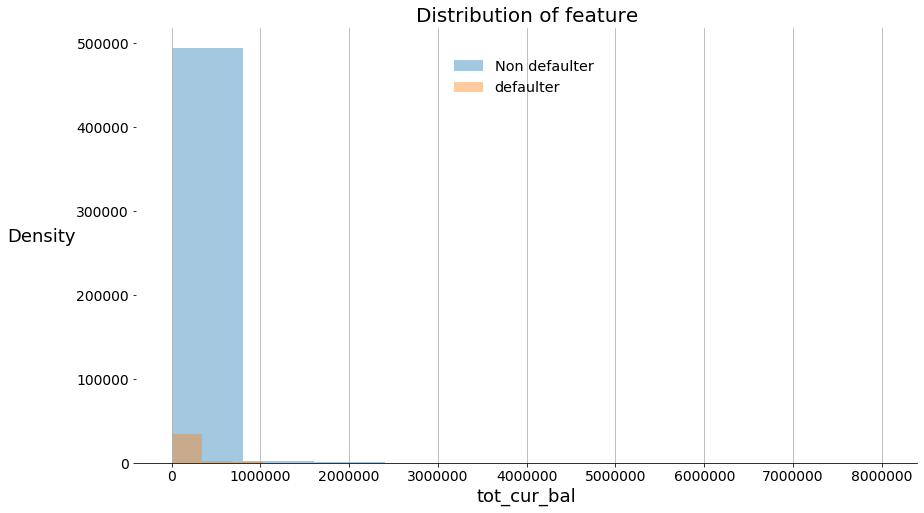

Average : 138990.46044971928
Average for non-defaulters: 140783.05283263308
Average for defaulters: 114396.42448572774


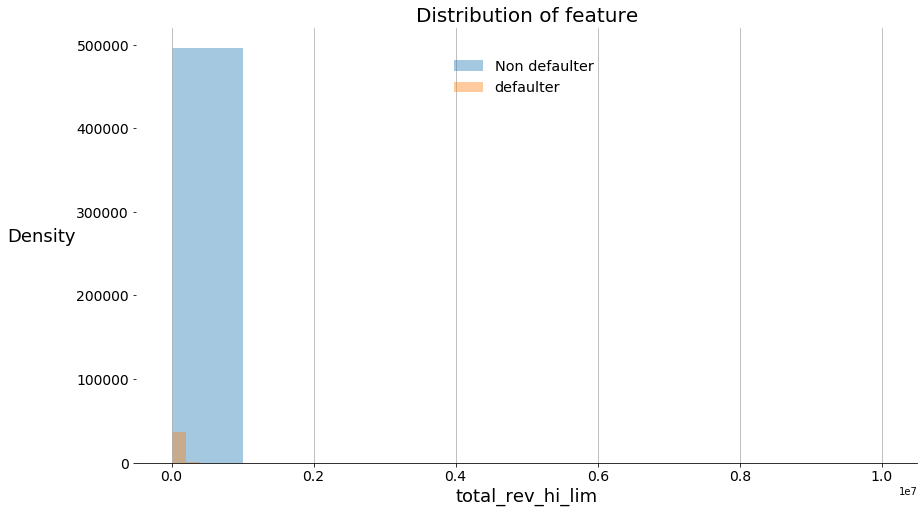

Average : 31110.61705773372
Average for non-defaulters: 31454.808582856083
Average for defaulters: 26388.372989285417


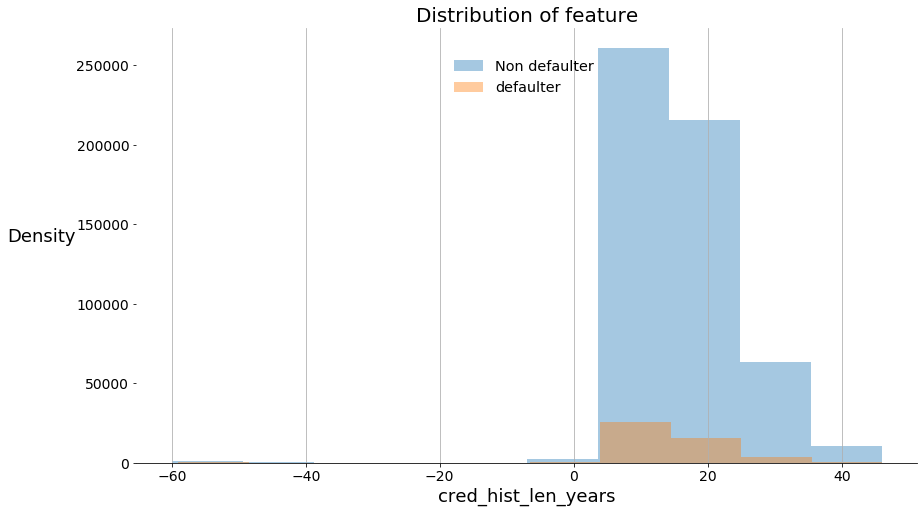

Average : 15.953687781521191
Average for non-defaulters: 16.06620214101465
Average for defaulters: 14.606075049831007


In [30]:
for feature in continuous_feature:
    plt.figure(figsize=(14,8))
    fig = sns.distplot(data[data['default_ind'] == 0][feature], label='Non defaulter', kde=0, bins=10)
    sns.distplot(data[data['default_ind'] == 1][feature], label='defaulter', kde=0, bins=10)
    sns.despine(left=1)
    fig.grid(axis='x')
    plt.xlabel(feature,fontsize=18)
    plt.ylabel('Density',fontsize=18, rotation=0)
    fig.yaxis.labelpad = 30
    plt.title('Distribution of feature',fontsize=20);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    fig.yaxis.labelpad = 35
    plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
    plt.show()
    print('Average :',data[feature].mean())
    print('Average for non-defaulters:',data[data['default_ind'] == 0][feature].mean())
    print('Average for defaulters:',data[data['default_ind'] == 1][feature].mean())

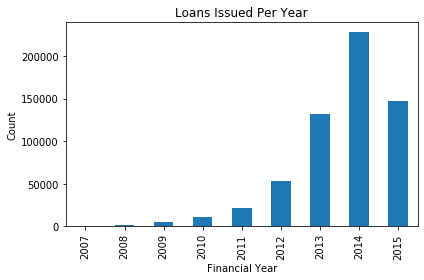

In [31]:
#Loan Issued over the years 


df['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [70]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type']

In [33]:
for feature in categorical_features:
    print('The feature is{} and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature isgrade and number of categories are 7
The feature issub_grade and number of categories are 35
The feature isemp_title and number of categories are 235312
The feature ishome_ownership and number of categories are 6
The feature isverification_status and number of categories are 3
The feature ispymnt_plan and number of categories are 2
The feature ispurpose and number of categories are 14
The feature istitle and number of categories are 60954
The feature iszip_code and number of categories are 901
The feature isaddr_state and number of categories are 50
The feature isinitial_list_status and number of categories are 2
The feature isapplication_type and number of categories are 1


In [49]:
for feature in categorical_features:
    print(feature,df[feature].value_counts())

grade B    173770
C    165709
A    101823
D     92853
E     46749
F     14933
G      3341
Name: grade, dtype: int64
sub_grade B3    38527
B4    37940
C1    35966
C2    35440
C3    33751
B2    33316
B5    33255
C4    32853
A5    30752
B1    30732
C5    27699
D1    24177
A4    23750
D2    19897
D3    17603
D4    17035
A3    16208
A1    15726
A2    15387
D5    14141
E1    12164
E2    11236
E3     9309
E4     7708
E5     6332
F1     4725
F2     3457
F3     2862
F4     2218
F5     1671
G1     1125
G2      882
G3      610
G4      396
G5      328
Name: sub_grade, dtype: int64
emp_title Teacher                   9029
Manager                   7539
Registered Nurse          3778
Owner                     3652
RN                        3573
                          ... 
SafeStreets USA              1
Deputy superintendent        1
MillWright                   1
Asst Prof                    1
director of crewing          1
Name: emp_title, Length: 216655, dtype: int64
home_ownership MORTGAGE    

In [111]:
#Removing columns with highly unique values and highly biased columns
df.drop(['emp_title','title','zip_code','pymnt_plan','application_type','addr_state'],axis=1,inplace=True)

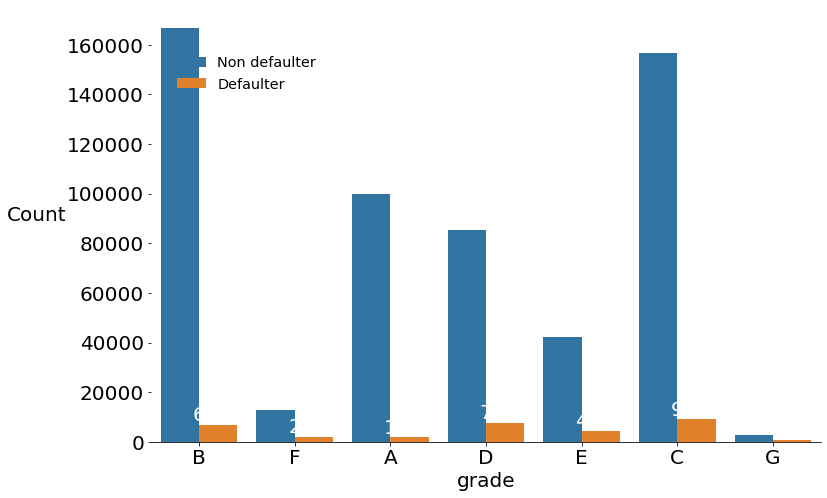

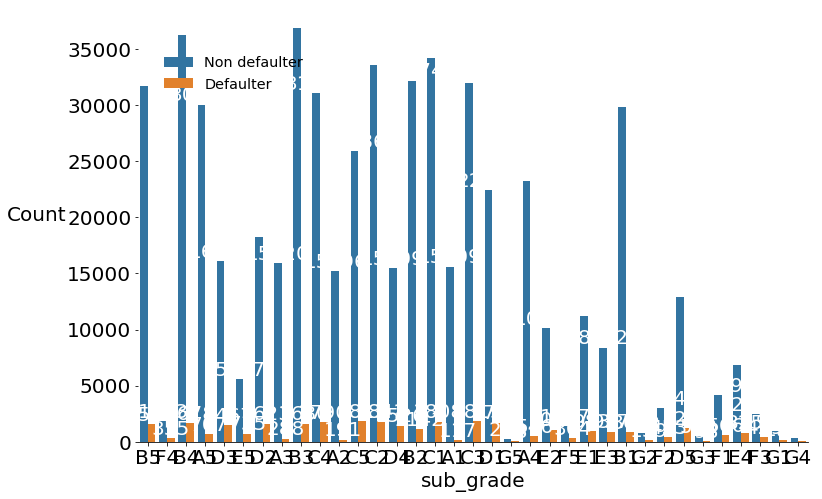

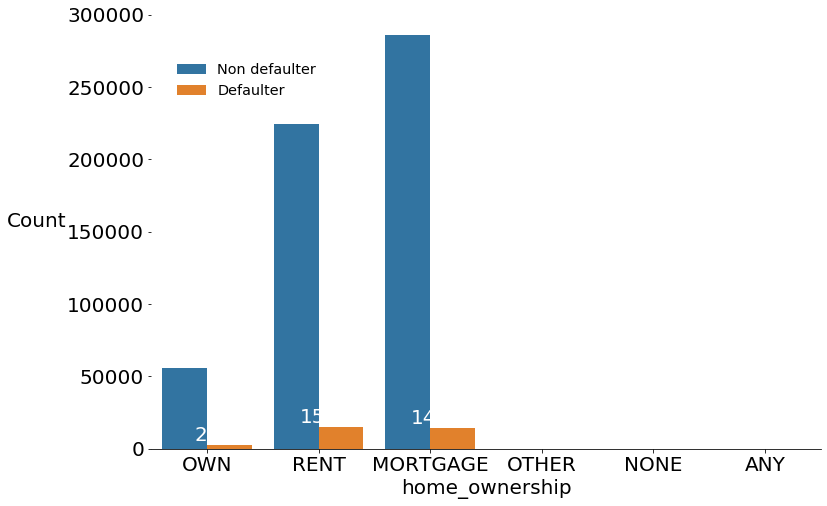

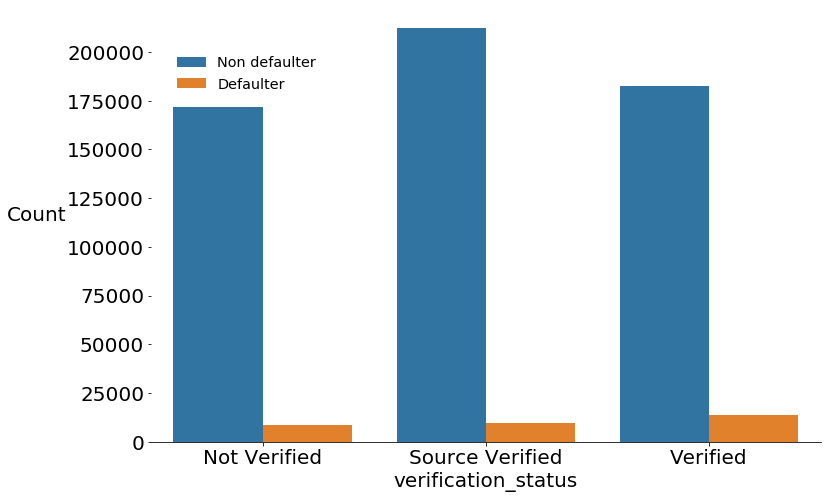

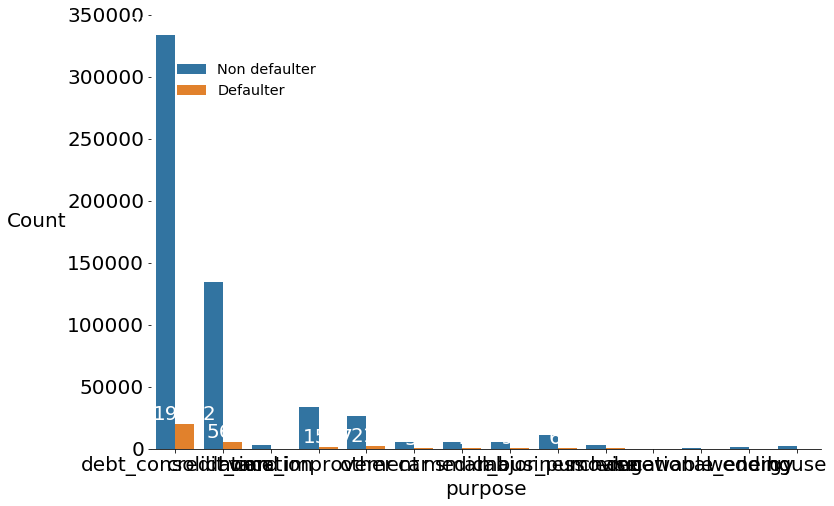

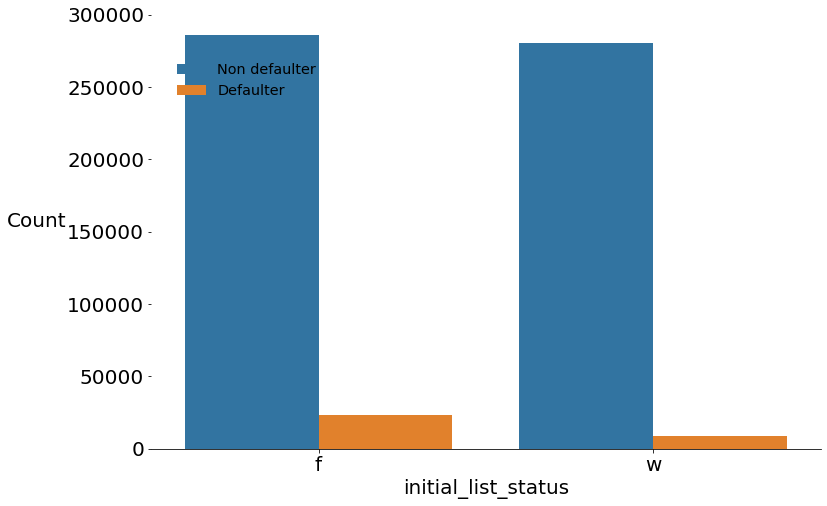

In [53]:
for feature in categorical_features:
    data=df.copy()
    plt.figure(figsize=(12,8))
    fig = sns.countplot(x=feature, hue='default_ind', data=data)
    sns.despine(left=True)
    fig.set_xlabel(feature, fontsize=20)
    plt.xticks(fontsize=20)
    fig.set_ylabel('Count', fontsize=20, rotation=0)
    fig.yaxis.labelpad = 30
    plt.yticks(fontsize=20)
    for p in fig.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
    plt.legend(labels =['Non defaulter','Defaulter'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
    plt.show()

In [ ]:
##  Feature Engineering
We will be performing all the below steps in Feature Engineering

1. Missing values
2. Categorical variables: remove rare labels
3. Standarise the values of the variables to the same range

In [72]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
for feature in features_nan:
    print('{}:{}% missing values'.format(feature,np.round(df[feature].isnull().mean()*100,4)))

In [73]:
#there are no Categorical features with missing values

In [112]:
df.drop(['last_pymnt_d','next_pymnt_d','last_credit_pull_d','earliest_cr_line','issue_d'],axis=1,inplace=True)

In [113]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
## We will print the numerical nan variables and percentage of missing values
for feature in numerical_with_nan:
    print('{}:{}% missing values'.format(feature,np.round(df[feature].isnull().mean()*100),4))

emp_length:5.0% missing values
mths_since_last_delinq:53.0% missing values
revol_util:0.0% missing values
tot_coll_amt:11.0% missing values
tot_cur_bal:11.0% missing values
total_rev_hi_lim:11.0% missing values


In [114]:
for feature in numerical_with_nan:
    ## We will replace nans with zero since median/median imputation is not the right choice for this data
    

    df[feature].fillna(df[feature]==0,inplace=True)
    df[feature]=df[feature].astype('float64')
    
df[numerical_with_nan].isnull().sum()

emp_length                0
mths_since_last_delinq    0
revol_util                0
tot_coll_amt              0
tot_cur_bal               0
total_rev_hi_lim          0
dtype: int64

In [115]:
#Handling skewness
for feature in continuous_feature:
    if ((df[feature].skew()>1.0) | (df[feature].skew()<-1.0)):
        df[feature]=np.log(df[feature]+1)
        print(feature,df[feature].skew())

annual_inc 0.19862537700344363
mths_since_last_delinq 0.35253129235822045
open_acc -0.15110968013938536
revol_bal -2.7833043191940896
out_prncp -0.30295058150267246
total_pymnt -0.6148608423841172
total_rec_prncp -0.8461979107585411
total_rec_int -0.734111003005274
last_pymnt_amnt 0.5905863203834177
tot_coll_amt 2.6731449956191367
tot_cur_bal -2.007731742550702
total_rev_hi_lim -2.2047970625655333


In [ ]:
## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [116]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features
for feature in categorical_features:
    temp=df.groupby(feature)['default_ind'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')


In [117]:
#Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
for feature in categorical_features:
    labelencoder=LabelEncoder()
    df[feature]=labelencoder.fit_transform(df[feature])
df[categorical_features].head() 

,grade,sub_grade,home_ownership,verification_status,purpose,initial_list_status
0,1,6,2,2,2,0
1,2,13,2,1,1,0
2,2,14,2,0,7,0
3,2,10,2,1,6,0
4,1,9,2,1,6,0


In [118]:
#Feature scaling
scaling_feature=[feature for feature in df.columns if feature not in year_feature+['default_ind']]
len(scaling_feature)

31

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scaling_feature])

MinMaxScaler()

In [120]:
df[scaling_feature]=scaler.transform(df[scaling_feature])

In [121]:
data=pd.concat([df['default_ind'].reset_index(drop=True),
                pd.DataFrame(df[scaling_feature],columns=scaling_feature)],axis=1)
data.head()

,default_ind,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cred_hist_len_years
0,0,0.130435,0.0,0.225180,0.105558,0.166667,0.24,1.00,0.666667,0.260777,1.0,0.285714,0.691423,0.0,0.125,0.00000,0.307324,0.0,0.645125,0.093803,0.04375,0.0,0.00000,0.791314,0.814039,0.669614,0.0,0.490374,0.0,0.0,0.0,0.811321
1,1,0.057971,1.0,0.420363,0.031657,0.333333,0.52,0.05,0.666667,0.288764,0.5,0.142857,0.025006,0.0,0.625,0.00000,0.307324,0.0,0.503509,0.010535,0.01250,0.0,0.00000,0.630900,0.585455,0.602120,1.0,0.456282,0.0,0.0,0.0,0.679245
2,0,0.055072,0.0,0.449514,0.049229,0.333333,0.56,1.00,0.666667,0.176451,0.0,1.000000,0.218055,0.0,0.250,0.00000,0.243548,0.0,0.541494,0.110389,0.05000,0.0,0.00000,0.730358,0.743911,0.634477,0.0,0.616728,0.0,0.0,0.0,0.660377
3,0,0.275362,0.0,0.345163,0.232102,0.333333,0.40,1.00,0.666667,0.350810,0.5,0.857143,0.500125,0.0,0.125,0.68365,0.531583,0.0,0.584750,0.023535,0.21875,0.0,0.00000,0.858364,0.880276,0.762889,0.0,0.559942,0.0,0.0,0.0,0.707547
4,0,0.072464,1.0,0.311365,0.037366,0.166667,0.36,0.10,0.666667,0.411782,0.5,0.857143,0.448612,0.0,0.000,0.69892,0.614648,0.0,0.693285,0.060406,0.22500,0.0,0.63659,0.737325,0.737025,0.685309,0.0,0.402788,0.0,0.0,0.0,0.707547


In [122]:
data.to_csv('C:/Users/hp/Desktop/DSP/New folder (2)/Python/Credit risk/Preprocessed_Train_data.csv',index=False)